Verificare imagini copiate:
NORMAL: 7 imagini
PNEUMONIA: 8 imagini

Afișăm imaginile:


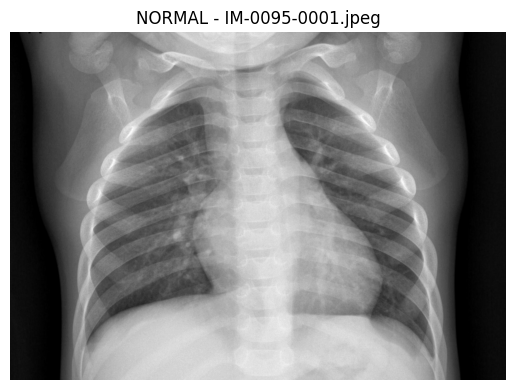

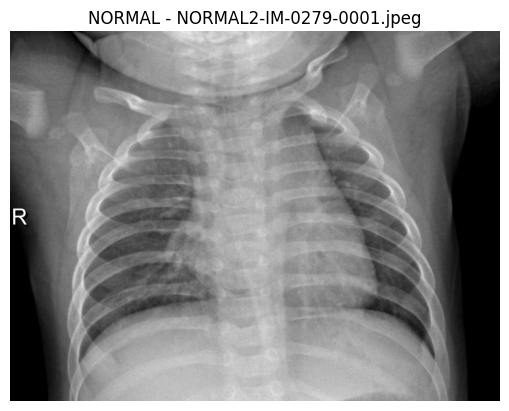

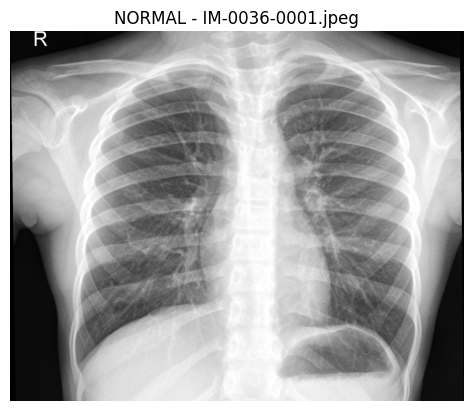

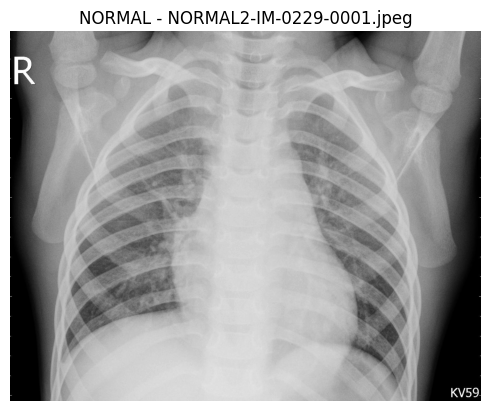

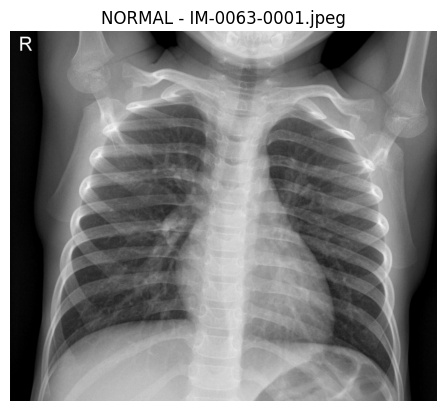

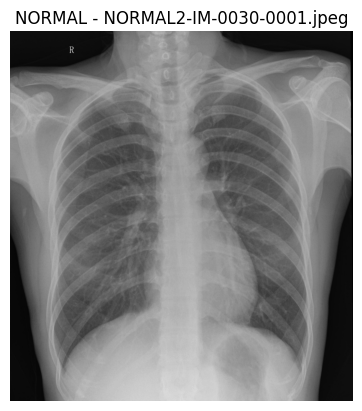

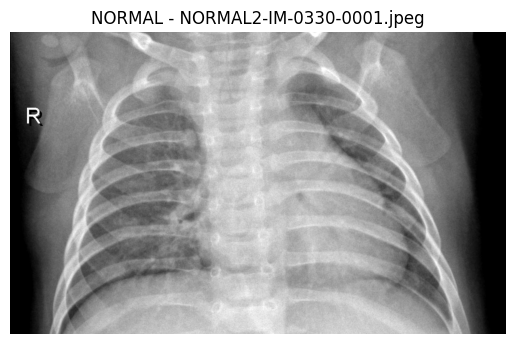

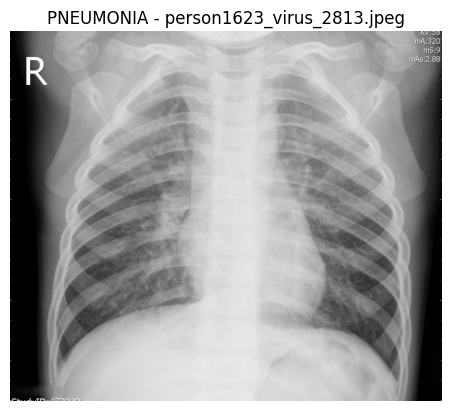

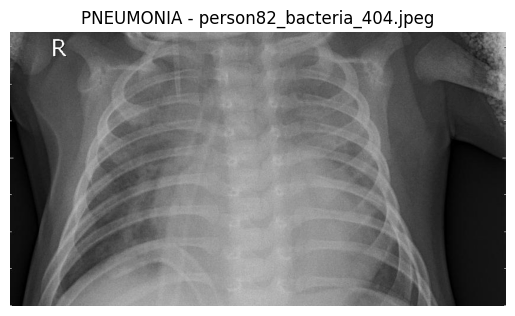

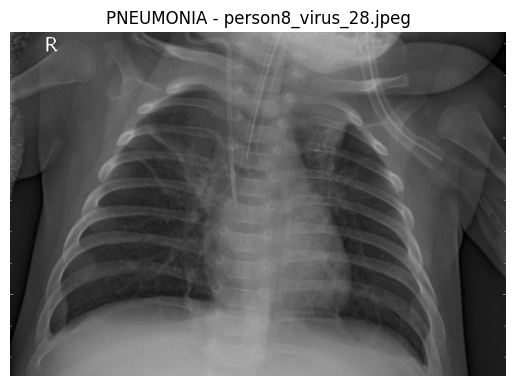

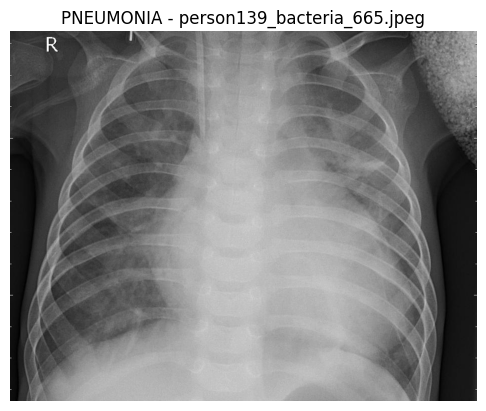

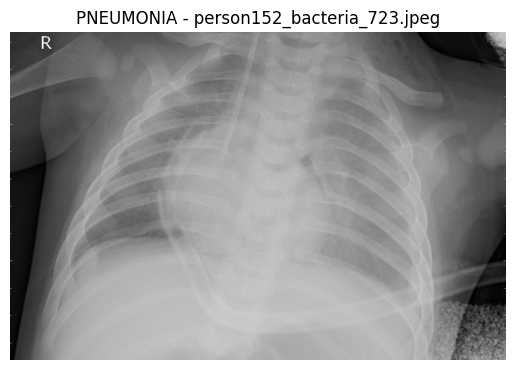

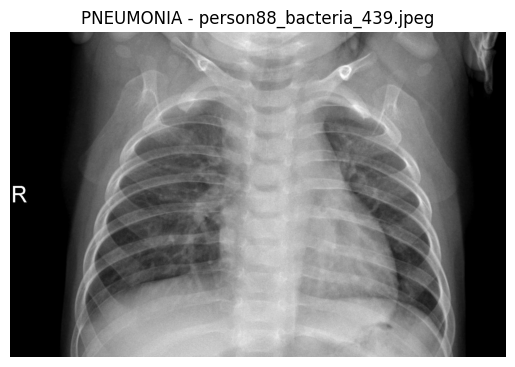

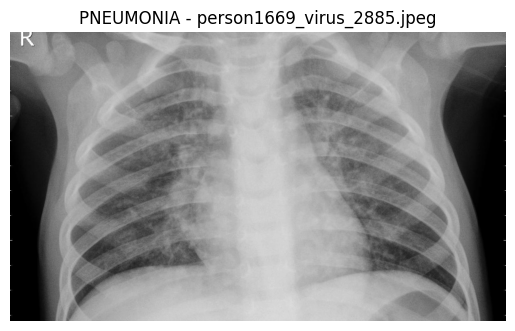

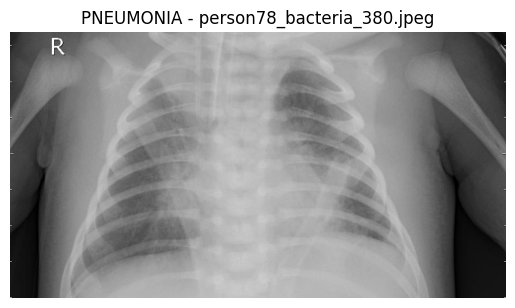

In [1]:
# 1. Importuri necesare
import os
import shutil
import random
import cv2
import matplotlib.pyplot as plt

# 2. Setăm calea către datasetul original
base_path = "/kaggle/input/chest-xray-pneumonia/chest_xray/test"

# 3. Calea unde salvăm subsetul nostru
subset_path = "/kaggle/working/demo_subset"

# 4. Ștergem folderul dacă există deja (ca să nu se adune imagini duplicate)
if os.path.exists(subset_path):
    shutil.rmtree(subset_path)

# 5. Creăm folderul de lucru din nou
os.makedirs(subset_path, exist_ok=True)

# 6. Categoriile de etichete
categories = ["NORMAL", "PNEUMONIA"]

# 7. Selectăm aleatoriu 7 imagini normale și 8 cu pneumonie
for category in categories:
    folder = os.path.join(base_path, category)
    nr = 7 if category == "NORMAL" else 8
    images = random.sample(os.listdir(folder), nr)
    
    cat_path = os.path.join(subset_path, category)
    os.makedirs(cat_path, exist_ok=True)
    
    for img in images:
        src = os.path.join(folder, img)
        dst = os.path.join(cat_path, img)
        shutil.copy(src, dst)

# 8. Verificăm că s-au copiat corect
print("Verificare imagini copiate:")
for category in categories:
    folder = os.path.join(subset_path, category)
    print(f"{category}: {len(os.listdir(folder))} imagini")

# 9. Afișăm imaginile din demo_subset
print("\nAfișăm imaginile:")
for category in categories:
    folder = os.path.join(subset_path, category)
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            plt.imshow(img, cmap='gray')
            plt.title(f"{category} - {img_file}")
            plt.axis('off')
            plt.show()
        else:
            print(f"⚠️ Nu s-a putut citi imaginea: {img_path}")


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt



# Căile către folderele de antrenament și validare
train_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/train"
val_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/val"

# Generator de imagini cu augmentare
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=15,
                                   zoom_range=0.1,
                                   shear_range=0.1,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

# Pregătirea seturilor de date
train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size=(150, 150),
                                              batch_size=16,
                                              class_mode='binary')

val_gen = val_datagen.flow_from_directory(val_dir,
                                          target_size=(150, 150),
                                          batch_size=16,
                                          class_mode='binary')


2025-05-30 07:59:15.902747: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748591956.105287      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748591956.163557      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [3]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # clasificare binară
])

model.compile(optimizer=Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-30 07:59:31.747611: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,481 (40.57 MB)

 Trainable params: 10,636,481 (40.57 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(train_gen,
                    epochs=10,
                    validation_data=val_gen,
                    callbacks=[early_stop])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 160s 483ms/step - accuracy: 0.7859 - loss: 0.6076 - val_accuracy: 0.7500 - val_loss: 0.6191
Epoch 2/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 141s 431ms/step - accuracy: 0.9235 - loss: 0.2014 - val_accuracy: 0.6875 - val_loss: 0.9785
Epoch 3/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 140s 430ms/step - accuracy: 0.9201 - loss: 0.2005 - val_accuracy: 0.5625 - val_loss: 1.0930
Epoch 4/10
326/326 ━━━━━━━━━━━━━━━━━━━━ 140s 428ms/step - accuracy: 0.9276 - loss: 0.1874 - val_accuracy: 0.6250 - val_loss: 0.9505


In [11]:
model.save("/kaggle/working/pneumonia_cnn_model.h5")


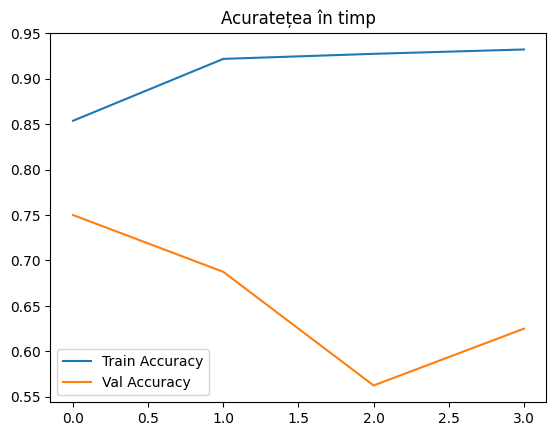

In [12]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Acuratețea în timp")
plt.show()


In [13]:
from tensorflow.keras.models import load_model

model = load_model('/kaggle/working/pneumonia_cnn_model.h5')


In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np

def load_and_preprocess(img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


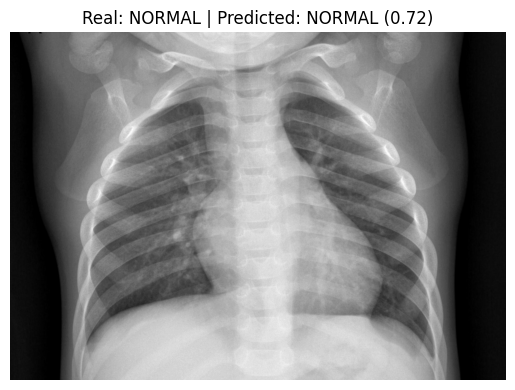

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


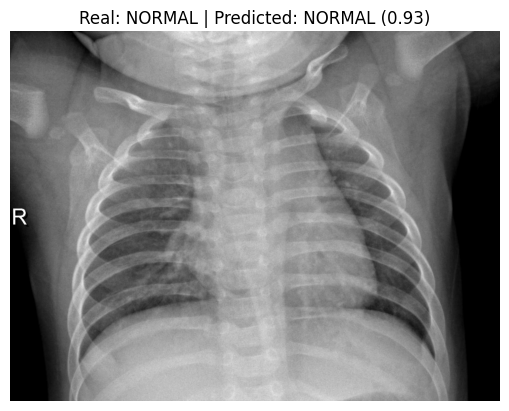

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


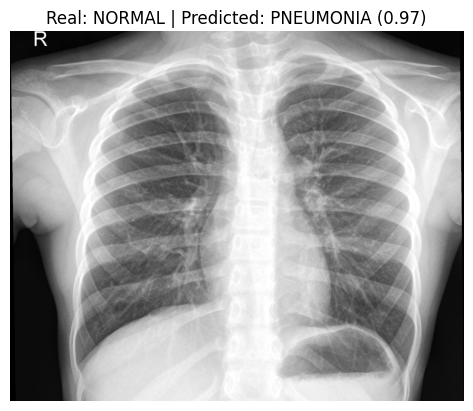

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


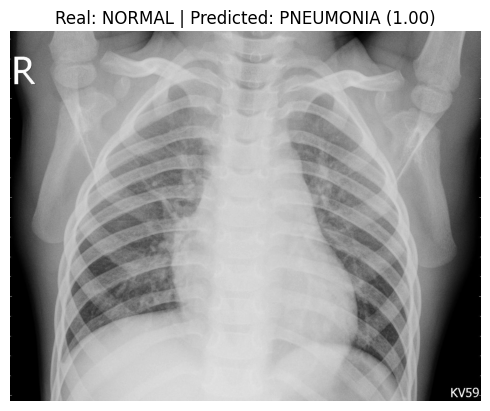

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


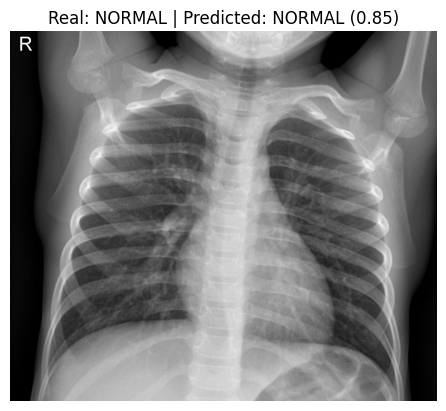

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


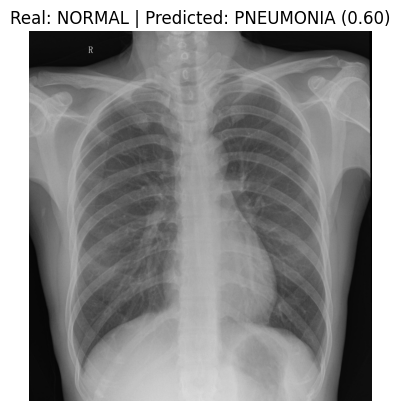

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


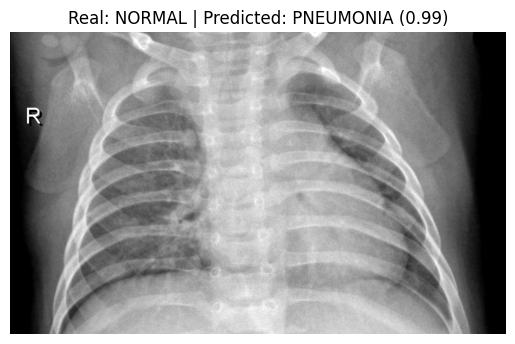

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


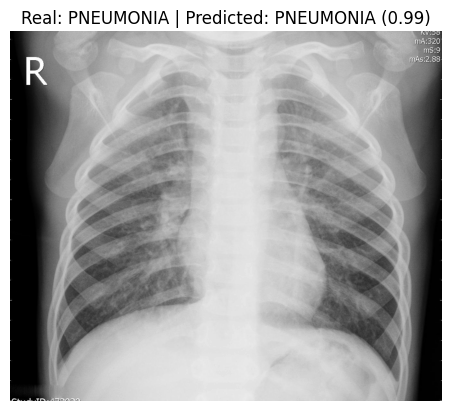

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


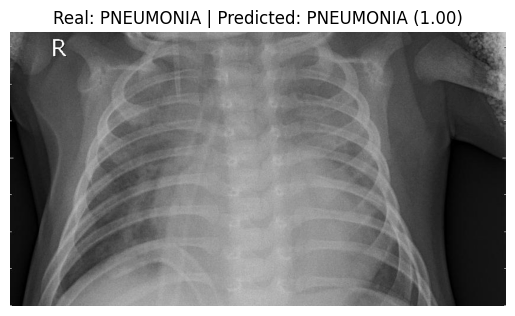

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


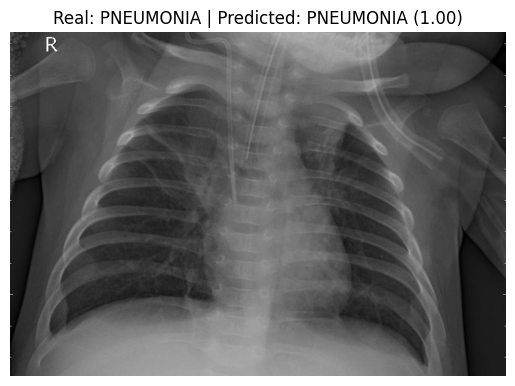

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


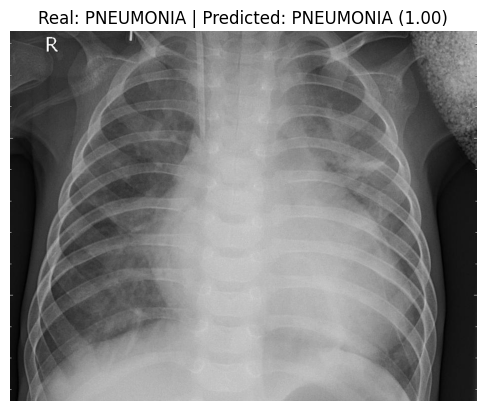

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


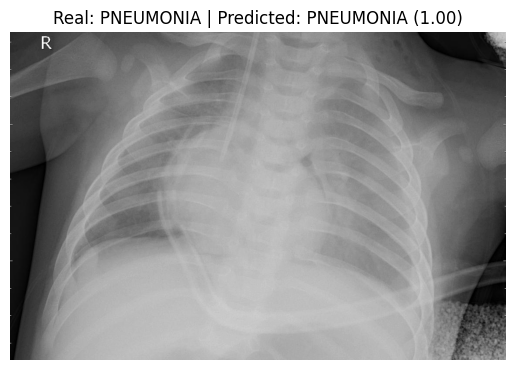

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


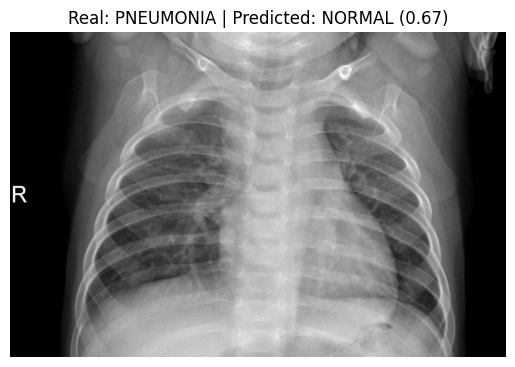

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


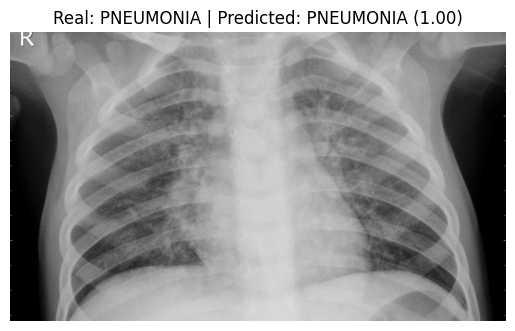

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


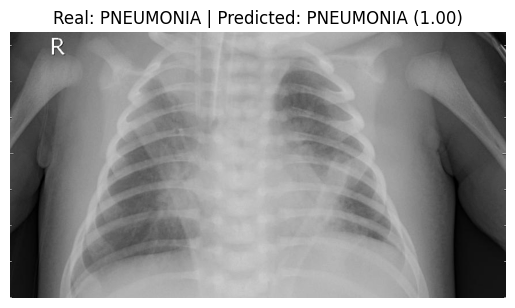

In [9]:
import os
import matplotlib.pyplot as plt
import cv2

for category in ["NORMAL", "PNEUMONIA"]:
    folder = os.path.join('/kaggle/working/demo_subset', category)
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img_tensor = load_and_preprocess(img_path)
        prediction = model.predict(img_tensor)[0][0]
        
        # Interpretarea rezultatului
        predicted_label = "PNEUMONIA" if prediction > 0.5 else "NORMAL"
        confidence = prediction if prediction > 0.5 else 1 - prediction

        # Afișare imagine + predicție
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img, cmap='gray')
        plt.title(f"Real: {category} | Predicted: {predicted_label} ({confidence:.2f})")
        plt.axis('off')
        plt.show()
